                  Statistic lab 

# Part Two


For the assignement i choosed a data from the website of migrationsverket of sweden : https://www.migrationsverket.se/Om-Migrationsverket/Statistik/Oppna-data.html

The received application for Asylium from 2020 to 2021

# Importing libraries we may use and cleaning the table 

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression
import numpy as np

In [160]:
data = pd.read_excel("/Users/mac/Desktop/statistics-labs/slab.xlsx")


In [161]:
data = data.drop([0, 1, 2])


In [162]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

In [163]:
data.head()

3,År,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,Summa,Andel av totalen
4,TOTALT,16303,23515,33016,31355,23161,17530,24322,36207,24353,...,81301,162877,28939,25666,21502,21958,12991,11412,780215,1
5,Kvinnor / flickor,6327,8497,12257,11235,8345,6334,8388,11079,8428,...,26484,48149,11587,10031,8573,8825,5081,4216,270669,0.346916
6,Män / pojkar,9976,15018,20759,20120,14816,11196,15934,25128,15925,...,54817,114728,17352,15635,12929,13133,7910,7196,509546,0.653084
7,Barn,4830,6450,9406,8573,6550,4798,6294,7605,6232,...,23110,70384,10909,8507,6329,6415,3566,3250,250582,0.32117
8,varav ensamkommande barn,350,461,550,561,388,398,820,1264,1510,...,7049,35369,2199,1336,944,902,500,523,69854,0.089532


# Exercice 2.1

 ### For qualitative variables: Gender categories and children categories-count

In [164]:
import pandas as pd

# Load the data 
file_path = '/Users/mac/Desktop/statistics-labs/slab.xlsx'
data_cleaned = pd.read_excel(file_path, skiprows=4)

# Rename the columns to english
data_cleaned.columns = ['Year', '2000', '2001', '2002', '2003', '2004', '2005', 
                        '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                        '2013', '2014', '2015', '2016', '2017', '2018', '2019', 
                        '2020', '2021', 'Sum', 'Percentage of Total']

# remove the column in the variable year where there is a NaN
data_cleaned = data_cleaned.dropna(subset=['Year'])
# Convert numeric columns to appropriate types
numeric_columns = data_cleaned.columns[1:-2]
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filling non-numeric entries in 'Percentage of Total' with the mean of the column
data_cleaned['Percentage of Total'] = pd.to_numeric(data_cleaned['Percentage of Total'], errors='coerce')
mean_percentage = data_cleaned['Percentage of Total'].mean()
data_cleaned['Percentage of Total'].fillna(mean_percentage, inplace=True)

# Quantitative Variables
quantitative_analysis = data_cleaned[['2000', 'Sum']].describe()

# Qualitative Variables
qualitative_analysis_year = data_cleaned['Year'].value_counts() # Frequency of each category in 'Year'
qualitative_analysis_percentage = data_cleaned['Percentage of Total'].describe() # Describe percentage

# The final result
print("Quantitative Data Descriptive Statistics (for '2000' and 'Sum'):")
print(quantitative_analysis)

print("\nQualitative Data Descriptive Statistics (for 'Year' and 'Percentage of Total'):")
print("Year - Frequency of Categories:\n", qualitative_analysis_year)
print("\nPercentage of Total - Descriptive Stats:\n", qualitative_analysis_percentage)





Quantitative Data Descriptive Statistics (for '2000' and 'Sum'):
               2000
count    116.000000
mean     483.525862
std     1960.372105
min        1.000000
25%        3.000000
50%       19.000000
75%       91.250000
max    16303.000000

Qualitative Data Descriptive Statistics (for 'Year' and 'Percentage of Total'):
Year - Frequency of Categories:
 Year
TOTALT                                 1
Nederländerna                          1
Kanada                                 1
Malaysia                               1
Japan                                  1
                                      ..
Chile                                  1
Moldavien                              1
Kenya                                  1
Montenegro                             1
*) Serbien och Montenegro 2003-2005    1
Name: count, Length: 184, dtype: int64

Percentage of Total - Descriptive Stats:
 count    184.000000
mean       0.018740
std        0.095335
min        0.000001
25%        0.000030
50%

/var/folders/kz/86j7yqpn4nb2vk338770w0_m0000gn/T/ipykernel_19984/989615315.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Percentage of Total'].fillna(mean_percentage, inplace=True)


1. Quantitative Variables:
Variable 1: Data from the year 2000.
Variable 2: Sum (the total sum of values).
Descriptive Statistics: We use .describe() to get statistical summaries like mean, standard deviation, minimum, maximum, etc.
2. Qualitative Variables:
Variable 1: Year (treated as categorical, which includes labels like "TOTALT", "Kvinnor / flickor", etc.).
Analysis: We use value_counts() to calculate the frequency of each category in the Year column.
Variable 2: Percentage of Total (used as a qualitative measure here).
Analysis: We use .describe() to summarize this column, providing a general description of the distribution of percentages.
Final Answer:
We have:

Two quantitative variables: 2000 and Sum, described with standard descriptive statistics.
Two qualitative variables: Year (frequency of categories) and Percentage of Total (distribution summary).

### Summary Statistics 


In [165]:
# Extract the qualitative column ('Year')
qualitative_data = data_cleaned['Year']

# Frequency counts
frequency_counts = qualitative_data.value_counts()
print("Frequency Counts for each Category in 'Year':")
print(frequency_counts)

# Percentages
proportions = qualitative_data.value_counts(normalize=True) * 100
print("\nProportions (%) for each Category in 'Year':")
print(proportions)

# The most frequent category
mode_value = qualitative_data.mode()[0]
print(f"\nMode (Most Frequent Category) of 'Year': {mode_value}")

Frequency Counts for each Category in 'Year':
Year
TOTALT                                 1
Nederländerna                          1
Kanada                                 1
Malaysia                               1
Japan                                  1
                                      ..
Chile                                  1
Moldavien                              1
Kenya                                  1
Montenegro                             1
*) Serbien och Montenegro 2003-2005    1
Name: count, Length: 184, dtype: int64

Proportions (%) for each Category in 'Year':
Year
TOTALT                                 0.543478
Nederländerna                          0.543478
Kanada                                 0.543478
Malaysia                               0.543478
Japan                                  0.543478
                                         ...   
Chile                                  0.543478
Moldavien                              0.543478
Kenya                   


# Exercise 2.2: Confidence Interval Calculation

## 1. Confidence Interval for One Quantitative Variable

In [166]:

# Re-loading the data and re-running the analysis for calculating the confidence interval for the '2000' column

import pandas as pd
import scipy.stats as stats
import numpy as np


# Convert numeric columns to appropriate types
numeric_columns = data_cleaned.columns[1:-2]
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Extract the data for the year 2000
data_2000 = data_cleaned['2000'].dropna()

# Calculate the mean and standard error of the mean (SEM)
mean_2000 = np.mean(data_2000)
sem_2000 = stats.sem(data_2000)

# Define confidence level (95% confidence interval)
confidence_level = 0.95
confidence_interval = stats.t.interval(confidence_level, len(data_2000)-1, loc=mean_2000, scale=sem_2000)

confidence_interval, mean_2000



((122.98723528228038, 844.0644888556507), 483.5258620689655)

Lower band : 122.98723528228038
Upper Bound: 844.06
Mean: 483.525

==> We are confident at 95% that the population mean is in between 122.987 and 844.06. 483.525 is the mean of our sample.


## 2. Confidence Interval for the Difference Between Two Groups
We also calculate the confidence interval for the **difference** in asylum seekers between **women (Kvinnor / flickor)** and **men (Män / pojkar)**.

The formula for the confidence interval of the difference between two means is:


In [167]:
# Drop rows with missing 'Year' values
data_cleaned = data_cleaned.dropna(subset=['Year'])

# Filtering and converting data to numeric while dropping NaN values
women_asylum = data_cleaned.loc[data_cleaned['Year'] == 'Kvinnor / flickor'].drop(['Year', 'Percentage of Total'], axis=1)
women_asylum = pd.to_numeric(women_asylum.values.flatten(), errors='coerce')
women_asylum = women_asylum[~pd.isna(women_asylum)]

men_asylum = data_cleaned.loc[data_cleaned['Year'] == 'Män / pojkar'].drop(['Year', 'Percentage of Total'], axis=1)
men_asylum = pd.to_numeric(men_asylum.values.flatten(), errors='coerce')
men_asylum = men_asylum[~pd.isna(men_asylum)]

# Calculate means and standard errors
mean_women = women_asylum.mean()
mean_men = men_asylum.mean()
sem_women = stats.sem(women_asylum)
sem_men = stats.sem(men_asylum)

# Calculate the standard error of the difference
se_diff = (sem_women**2 + sem_men**2) ** 0.5

# Calculate the 95% confidence interval for the difference in means
mean_diff = mean_women - mean_men
confidence_interval_diff = stats.t.interval(0.95, len(women_asylum) + len(men_asylum) - 2, loc=mean_diff, scale=se_diff)



Negative lower bound : -70,087.29 :indicating that in sometimes the overage numbers in asylium seekers of the categori women/girls could be significanly less than men/boys.
Postive upper bound : 28543.460444406322 indicating that in some cases the number of asylium seekers in the category women/girls could be higher than men/boy
==> the confidence interval contains both positive and negative values this means that we can not conclude that the average of the aylium seekers is bigger in one group than the other group.

# Exercise 2.3: T-test for Difference Between Two Groups




In [168]:
from scipy.stats import ttest_ind

# ttest-ind is an embedded function that performs a T-test 
t_stat, p_value = ttest_ind(women_asylum, men_asylum, equal_var=False)  

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# result
if p_value < 0.05:
    print("The difference in asylum seekers between 'Kvinnor / flickor' and 'Män / pojkar' is statistically significant.")
else:
    print("There is no statistically significant difference in asylum seekers between 'Kvinnor / flickor' and 'Män / pojkar'.")


T-statistic: -0.848884170433431, P-value: 0.4020041508321478
There is no statistically significant difference in asylum seekers between 'Kvinnor / flickor' and 'Män / pojkar'.


# Exercise 2.4: Non-Parametric Test and Comparison with ANOVA









In [169]:
import pandas as pd
import scipy.stats as stats

# Assuming 'women_asylum' and 'men_asylum' are already extracted

# Perform the non-parametric Mann-Whitney U Test
u_stat, p_value_nonparametric = stats.mannwhitneyu(women_asylum, men_asylum, alternative='two-sided')

# Perform one-way ANOVA
f_stat, p_value_anova = stats.f_oneway(women_asylum, men_asylum)

# Output the results
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, P-value = {p_value_nonparametric}")
print(f"One-Way ANOVA: F-statistic = {f_stat}, P-value = {p_value_anova}")

# Interpretations for both tests
alpha = 0.05

# Non-parametric test interpretation
if p_value_nonparametric < alpha:
    print("The non-parametric test (Mann-Whitney U) indicates a statistically significant difference between the groups.")
else:
    print("The non-parametric test (Mann-Whitney U) does not indicate a statistically significant difference between the groups.")

# ANOVA test interpretation
if p_value_anova < alpha:
    print("The ANOVA test indicates a statistically significant difference between the groups.")
else:
    print("The ANOVA test does not indicate a statistically significant difference between the groups.")


Mann-Whitney U Test: U-statistic = 125.0, P-value = 0.0022602586975855104
One-Way ANOVA: F-statistic = 0.7206043348124545, P-value = 0.4005406860874936
The non-parametric test (Mann-Whitney U) indicates a statistically significant difference between the groups.
The ANOVA test does not indicate a statistically significant difference between the groups.


Given that Mann-Whitney does not rely on the assumption of normality : does not require the data to be normally distributed, while ANOVA assume normality.
Lets check if our data is normally distributed :

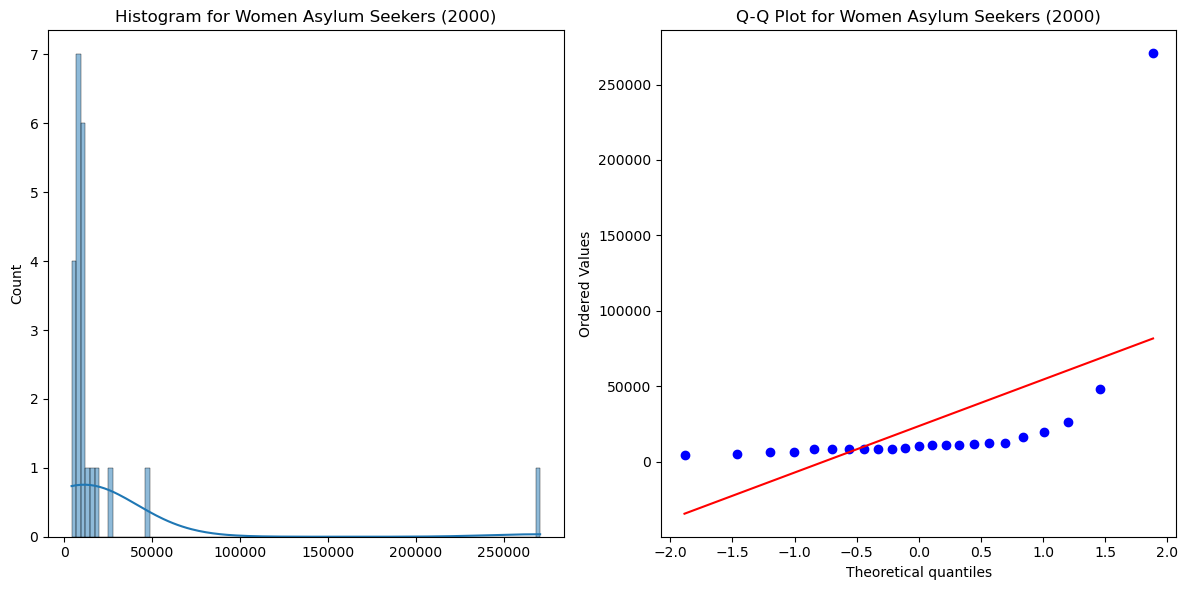

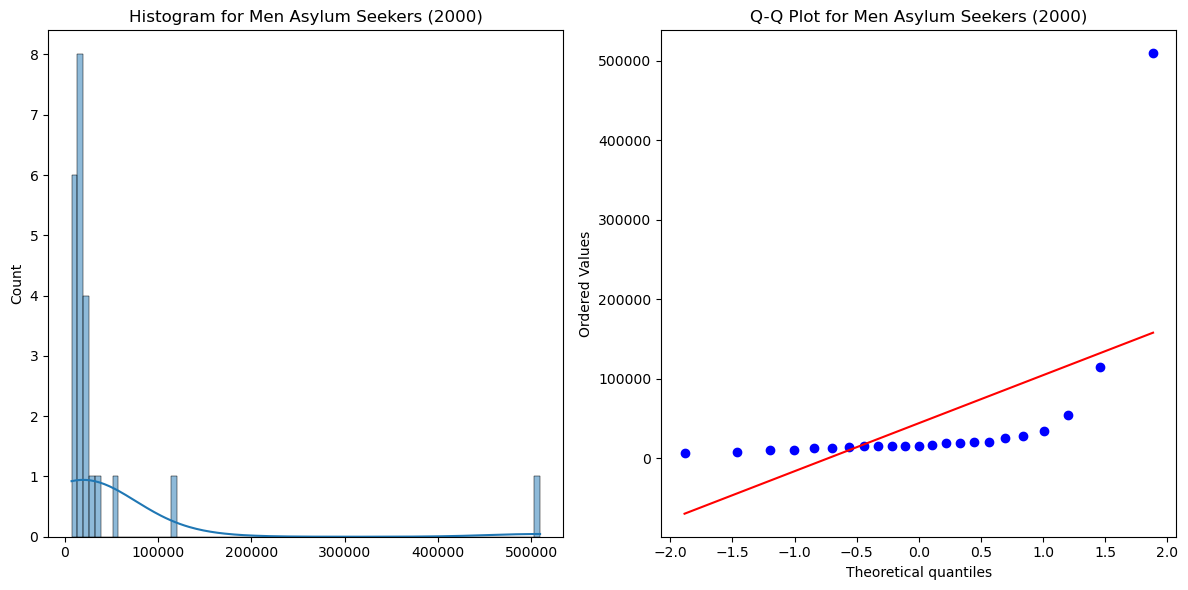

In [170]:
# Plotting the histograms and Q-Q plots for women and men asylum seekers without performing the Shapiro-Wilk test.

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Assuming 'women_asylum' and 'men_asylum' data are already extracted
# Visual Inspection with Histogram and Q-Q plot

# Plot for Women Asylum Seekers
plt.figure(figsize=(12, 6))

# Histogram Women
plt.subplot(1, 2, 1)
sns.histplot(women_asylum, kde=True)
plt.title("Histogram for Women Asylum Seekers (2000)")

#  plot  Women
plt.subplot(1, 2, 2)
stats.probplot(women_asylum, dist="norm", plot=plt)
plt.title("Q-Q Plot for Women Asylum Seekers (2000)")

plt.tight_layout()
plt.show()

# Plot Men 
plt.figure(figsize=(12, 6))

# Hist  for Men
plt.subplot(1, 2, 1)
sns.histplot(men_asylum, kde=True)
plt.title("Histogram for Men Asylum Seekers (2000)")

# Q-Q plot for Men
plt.subplot(1, 2, 2)
stats.probplot(men_asylum, dist="norm", plot=plt)
plt.title("Q-Q Plot for Men Asylum Seekers (2000)")

plt.tight_layout()
plt.show()


We see clearly that the plots are skewed and therefore we can not assume normality, that means Mann-Whitney is more reliable ==> Therefore we can conclude that there is significant diffirence between the two groups.

# Exercice2.5

In this exercice i choosed to use correlation function embedded in Python 

In [171]:
# Drop non-numeric columns and rows with missing 'Year' values
data_cleaned = data_cleaned.dropna(subset=['Year'])

# Convert all columns except 'Year' to numeric, forcing errors to NaN
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce', axis=1)

# Calculate the correlation matrix with numeric-only data
correlation_matrix = data_cleaned.corr()

# Flatten the correlation matrix and sort to see all correlations
all_correlations = correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates()

# Display the weakest correlations
print("All Correlations Sorted from Lowest to Highest:")
print(all_correlations.head(10))

# Display the strongest correlations
print("\nTop 10 Strongest Correlations:")
print(all_correlations.tail(10))

All Correlations Sorted from Lowest to Highest:
2014  2007    0.888701
2015  2007    0.895096
2007  2013    0.899820
2012  2007    0.914913
2015  2000    0.915901
2000  2014    0.918951
2014  2006    0.919693
2007  2019    0.921995
2015  2006    0.922457
2007  2017    0.923014
dtype: float64

Top 10 Strongest Correlations:
2017  2019                   0.996564
2005  2004                   0.997339
2020  2018                   0.997389
2018  2017                   0.997460
2020  2019                   0.997786
2016  2017                   0.997995
2004  2003                   0.998127
2019  2018                   0.999574
Sum   Percentage of Total    1.000000
Year  Year                        NaN
dtype: float64


==> according to the flatened correlation matrix, the strongest correlation is 2019-2018 ==> 0.999574.
The weekest are 2007 and 2014: 0.88 and 2007 and 2015: 0.89 and 2013 and 2007: 0.89 even those are the weekest but it is still high and close to 1 ! it indicates that the variable years are related / the data is very hoomogenous over time.We conclude also that the data may indicate similar trends from year to year.


# Exercice 2.6

In [172]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'data_cleaned' is your dataframe

# Select the independent variables (predictors) - data from 2000 to 2020
X = data_cleaned[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', 
                  '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
                  '2016', '2017', '2018', '2019', '2020']]

# Select the dependent variable (target) - data from 2021
y = data_cleaned['2021']

# Fill missing values with the column mean (imputation)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   2021   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          3.74e-140
Time:                        00:20:11   Log-Likelihood:                -1146.8
No. Observations:                 184   AIC:                             2338.
Df Residuals:                     162   BIC:                             2408.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6360     11.101      2.039      0.0

ANALYSE :
TOTALT=−1,428,000+727.67×Year

Year is not very strong predictor of totalt since the R squared is only 2,2 %
P value is very high 0.515 does mean that year does not explain tatlt .
The model is not good fit and maybe other variable is needed to explain total 

Based on the OLS model the linear regression model based on the coef  is :
2021=22.6360+(−0.0247)⋅2000+0.0557⋅2001+(−0.0248)⋅2002+⋯+0.4596⋅2020
R squared = 0.987  => 98.7% of the variance in the year 2021  can be explained by 2000-2020 datas